Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [76]:
raw_songs = pd.read_csv('taylor_swift_spotify.csv')

assert (raw_songs.index == raw_songs['Unnamed: 0']).all()
songs = raw_songs.drop(columns=['Unnamed: 0', 'id', 'uri'])
songs.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,66,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,67,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,68,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,67,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,65,193289


Meaning of each variable: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

Initial Plot

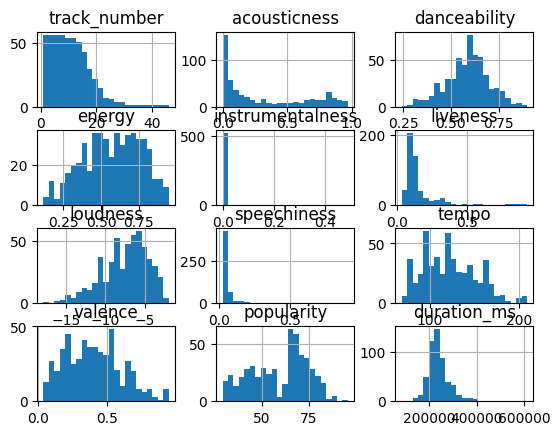

In [77]:
songs.hist(bins=23) 
plt.show()

Converting Release date to year as a float

In [78]:
songs['release_date'] = pd.to_datetime(songs['release_date'])

songs['release_date'] = songs['release_date'].dt.year + (songs['release_date'].dt.month - 1) / 12 + (songs['release_date'].dt.day - 1) / 365

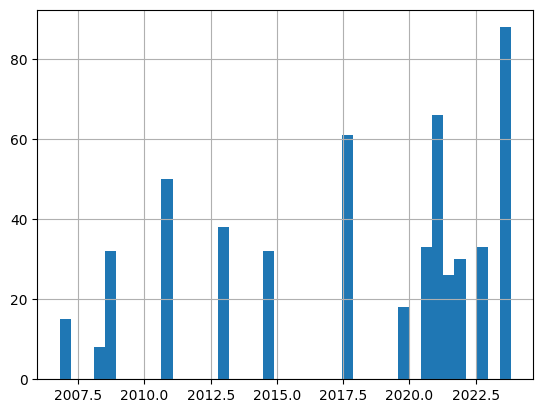

In [79]:
songs['release_date'].hist(bins=40)
plt.show()

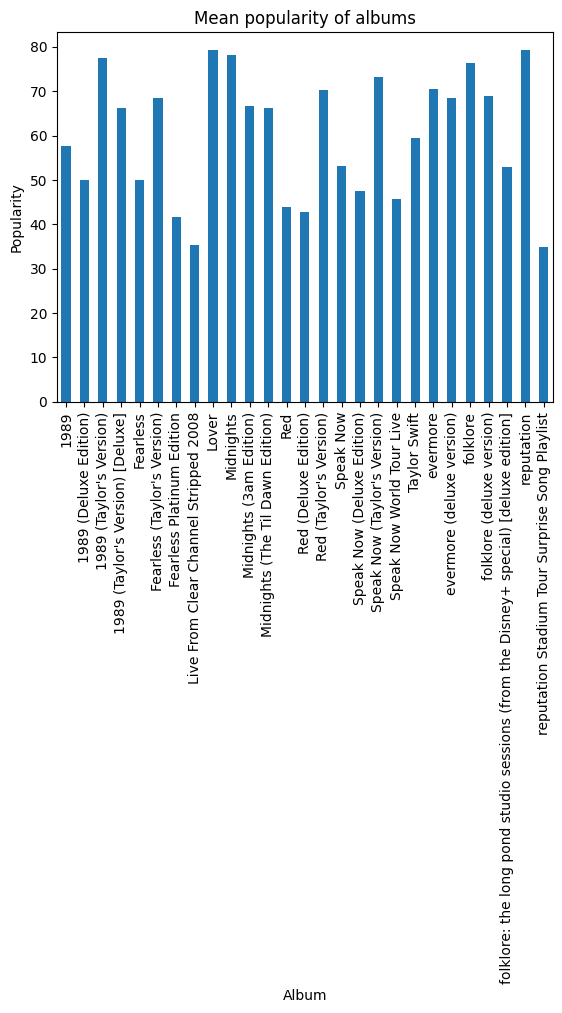

In [80]:
grouped_songs = songs.groupby('album')['popularity'].mean()
grouped_songs.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Mean popularity of albums')
plt.show()

### Removing voice memo

In [81]:
songs = songs[~songs.name.str.contains('Voice Memo')]

songs[songs.name.str.contains('Voice Memo')]

songs.to_csv('dropped_voice_memo.csv')

Not songs, rather commentaries about the making off.

### Categorical Variables: taylor_version, not_first_release, live

Deluxe edition

In [82]:
deluxe_wordings = ['deluxe', 'platinum']
songs['deluxe_album'] = songs['album'].str.contains('|'.join(deluxe_wordings), case=False)

songs_without_deluxe = songs[songs['deluxe_album'] == False]

songs['deluxe_album'].value_counts()

deluxe_album
False    360
True     167
Name: count, dtype: int64

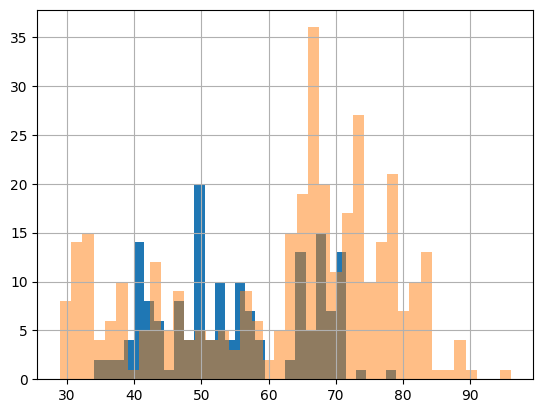

In [83]:
songs[songs['deluxe_album'] == True ]['popularity'].hist(bins=30, alpha=1)
songs[songs['deluxe_album'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.show()

Convert Taylor’s Version to Taylor's Version

In [84]:
# songs['name'] = songs['name'].str.replace("Taylor’s Version", "Taylor's Version")
# songs['taylors_version'] = songs['name'].str.contains("Taylor's Version")
songs['taylors_version'] = songs['name'].str.contains('|'.join(['Taylor\'s Version', 'Taylor’s Version']))
songs['taylors_version'].value_counts()

taylors_version
False    406
True     121
Name: count, dtype: int64

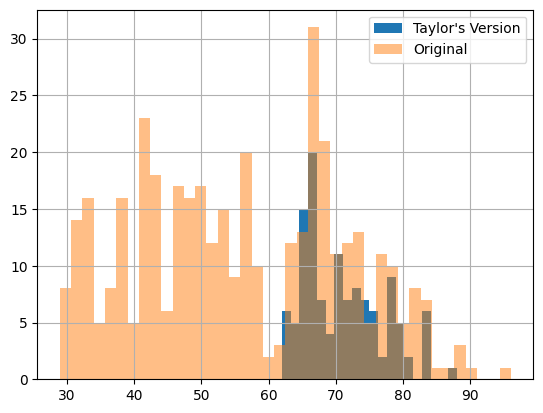

In [85]:
songs[songs['taylors_version'] == True ]['popularity'].hist(bins=20, alpha=1)
songs[songs['taylors_version'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.legend(['Taylor\'s Version', 'Original'])
plt.show()

performed_live categorical variable

In [86]:
# "folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]"
live_albums = ["Live From Clear Channel Stripped 2008", "Speak Now World Tour Live", "reputation Stadium Tour Surprise Song Playlist"]
songs['performed_live'] = songs['album'].isin(live_albums)

songs_without_live = songs[~songs['performed_live']]

songs['performed_live'].value_counts()

performed_live
False    457
True      70
Name: count, dtype: int64

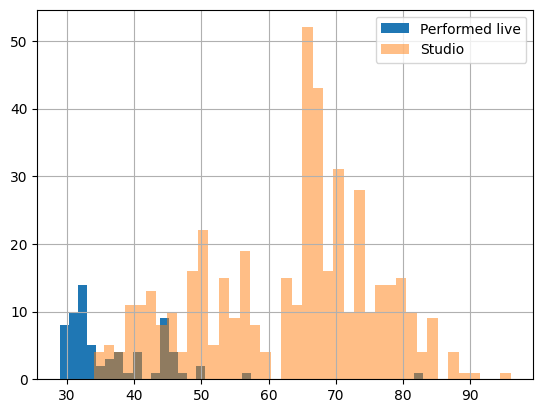

In [87]:
songs[songs['performed_live'] == True ]['popularity'].hist(bins=40, alpha=1)
songs[songs['performed_live'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.legend(['Performed live', 'Studio'])
plt.show()


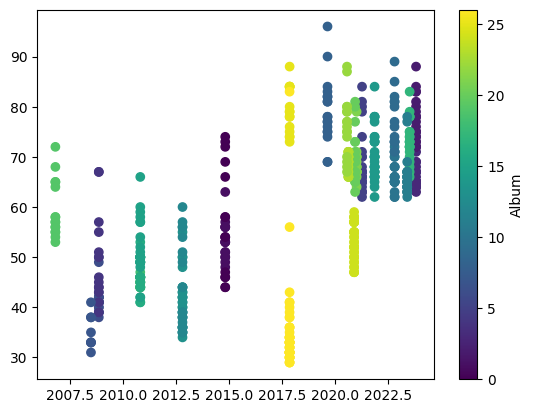

In [88]:
plt.scatter(songs['release_date'], songs['popularity'], c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')
plt.show()

Folklore

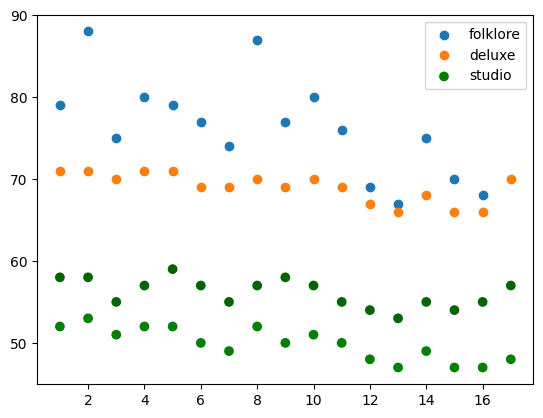

In [89]:

folklore = songs[songs['album'] == 'folklore']
deluxe = songs[songs['album'] == 'folklore (deluxe version)']
studio = songs[songs['album'] == 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]']

plt.scatter(folklore['track_number'], folklore['popularity'])
plt.scatter(deluxe['track_number'], deluxe['popularity'])
plt.scatter(studio['track_number'], studio['popularity'], c = ['green']* (len(studio)//2) + ['darkgreen']*(len(studio)//2))
plt.legend(['folklore', 'deluxe', 'studio'])
plt.show()

Midnights

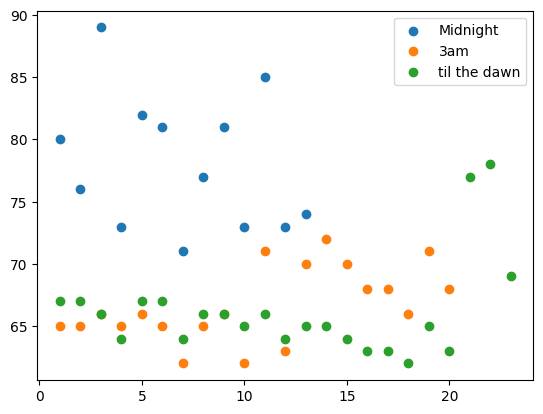

['Hits Different', 'Snow On The Beach (feat. More Lana Del Rey)', 'Karma (feat. Ice Spice)']


In [90]:
midnight = songs[songs['album'] == 'Midnights']
threeam = songs[songs['album'].str.contains('3am', case=False)]
untilmidnight = songs[songs['album'].str.contains('The Til Dawn Edition', case=False)]

plt.scatter(midnight['track_number'], midnight['popularity'])
plt.scatter(threeam['track_number'], threeam['popularity'])
plt.scatter(untilmidnight['track_number'], untilmidnight['popularity'])
plt.legend(['Midnight', '3am', 'til the dawn'])
plt.show()

#songs.scatter(songs['album'], songs['popularity'])
from itertools import zip_longest
print( list(s1 for s2, s1 in zip_longest(threeam['name'], untilmidnight['name']) if s1 != s2 ))

We leave the songs as this (don't need to merge) with only a not_first_release indicator.

In [91]:
first_release_indexes = songs.groupby('name').apply(lambda group: group.index.max(), include_groups=False)

songs['not_first_release'] = songs.index != songs['name'].map(first_release_indexes)
songs['not_first_release'] &= ~songs['performed_live']

# problem with the long pond: all should be True
songs.loc[songs['album'].str.contains('the long pond'), 'not_first_release'] = True

# songs[songs['album'].str.contains('1989 (', regex=False)][['name', 'album', 'not_first_release']]
# songs.loc[songs['album'].str.contains('the long pond'), 'not_first_release']

209    True
210    True
211    True
212    True
213    True
214    True
215    True
216    True
217    True
218    True
219    True
220    True
221    True
222    True
223    True
224    True
225    True
226    True
227    True
228    True
229    True
230    True
231    True
232    True
233    True
234    True
235    True
236    True
237    True
238    True
239    True
240    True
241    True
242    True
Name: not_first_release, dtype: bool

In [101]:
name = 'Midnights (Deluxe Edition)'
name = name[:len('Midnights')].rstrip()
name

'Midnights'

In [103]:
songs.loc[songs['album'].str.contains('(Deluxe Edition)'), 'album'] 
songs['album'] = songs['album'].apply(lambda name: name[:-len('(Deluxe Edition)')].rstrip() if '(Deluxe Edition)' in name else name)
songs['album'] = songs['album'].apply(lambda name: name[:-len('Platinum Edition')].rstrip() if 'Platinum Edition' in name else name)
songs['album'] = songs['album'].apply(lambda name: name[:-len('[Deluxe]')].rstrip() if '[Deluxe]' in name else name)
songs['album'] = songs['album'].apply(lambda name: name[:-len('(deluxe version)')].rstrip() if '(deluxe version)' in name else name)
songs['album'] = songs['album'].apply(lambda name: name[:len('Midnights')].rstrip() if 'Midnights' in name else name)
songs['album'] = songs['album'].apply(lambda name: name[:len('folklore')].rstrip() if 'folklore' in name else name)

# songs['album'] = songs['album'].apply(lambda name: name[:len('(Taylor\'s Version)')].rstrip() if '(Taylor\'s Version)' in name else name) 
# si volem unificar Taylor's Version això
# Pensa però que s'ha d'anar en compte perquè hi ha una distància temporal molt gran entre Taylor's Version i les originals.

songs['album'].value_counts()


C:\Users\mique\AppData\Local\Temp\ipykernel_19392\3010999230.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  songs.loc[songs['album'].str.contains('(Deluxe Edition)'), 'album']


album
folklore                                          67
Midnights                                         56
reputation Stadium Tour Surprise Song Playlist    46
1989 (Taylor's Version)                           43
Red                                               38
Speak Now                                         34
Fearless                                          32
evermore                                          32
Red (Taylor's Version)                            30
1989                                              29
Fearless (Taylor's Version)                       26
Speak Now (Taylor's Version)                      22
Lover                                             18
Speak Now World Tour Live                         16
reputation                                        15
Taylor Swift                                      15
Live From Clear Channel Stripped 2008              8
Name: count, dtype: int64

### Correlation of variables

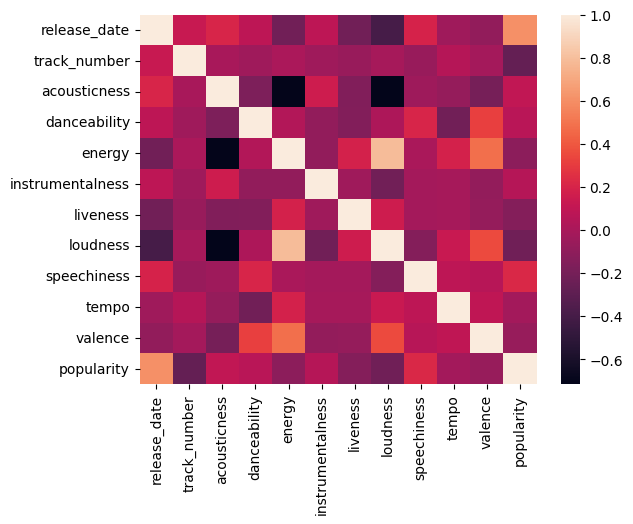

In [45]:
idx = [i for i in range(2,14)] # numeric data
corr = songs.iloc[:, idx].corr()
#corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr)
plt.show()

Problemes: veiem com acousticness, danceability, enrgy i loudness estan totes relacionades entre elles. A més a més, relase_date i popularity fortament correlades (ja ho sabíem).

### Popularity vs time:

Popularity vs time

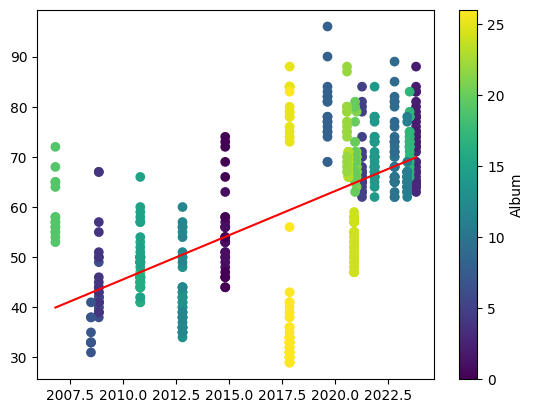

1.7619623268353404 -3495.9791890539886


In [26]:

# Scatter plot
plt.scatter(songs['release_date'], songs['popularity'], c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

# Linear regression line
x = songs['release_date']
y = songs['popularity']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)

Difference from regression line in popularity vs time 

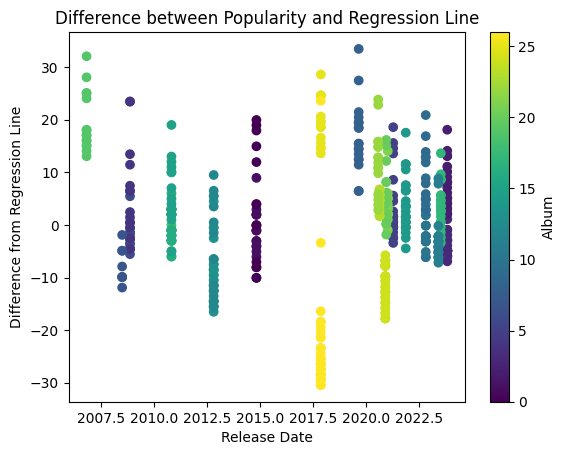

In [27]:
# Scatter plot
plt.scatter(x, y - (m*x + b), c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

plt.xlabel('Release Date')
plt.ylabel('Difference from Regression Line')
plt.title('Difference between Popularity and Regression Line')
plt.show()


Popularity vs time without live performances

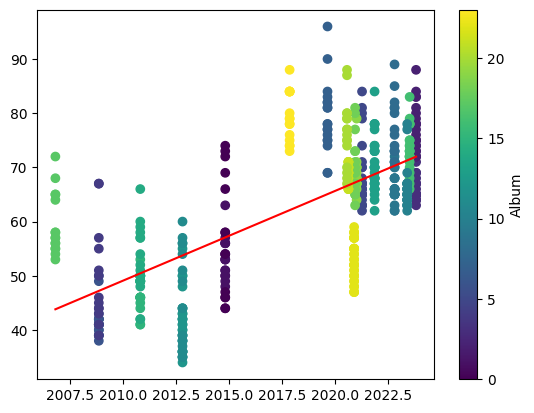

1.6561814155755255 -3279.831071424405


In [28]:

songs_without_live = songs[songs['performed_live'] == False]

# Scatter plot
plt.scatter(songs_without_live['release_date'], songs_without_live['popularity'], c=songs_without_live['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

# Linear regression line
x1 = songs_without_live['release_date']
y1 = songs_without_live['popularity']
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b, color='red')

plt.show()
print(m, b)

### Popularity vs mean by album

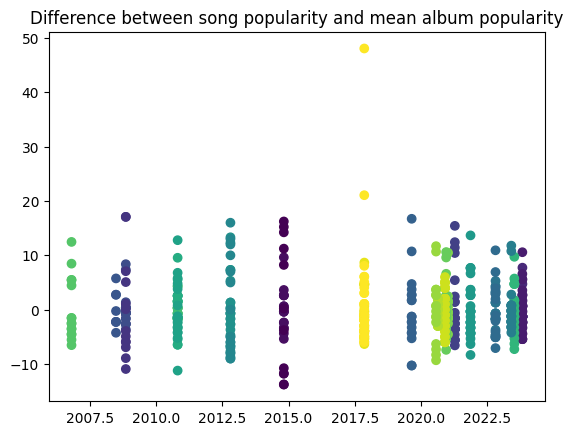

In [29]:
albums = songs.groupby('album')['popularity'].mean()

plt.scatter(songs['release_date'], songs['popularity'] - albums[songs['album']].values, c=songs['album'].astype('category').cat.codes)
plt.title("Difference between song popularity and mean album popularity")
plt.show()

#### Solving relase_date and popularity correlation:

the variable release_date contains vairability that is very hard to explain if we want to create a model that predicst popularity with only the parameters established earlier. Therefore, we have to delete it

In [30]:
songs = songs.drop(columns=['release_date'])

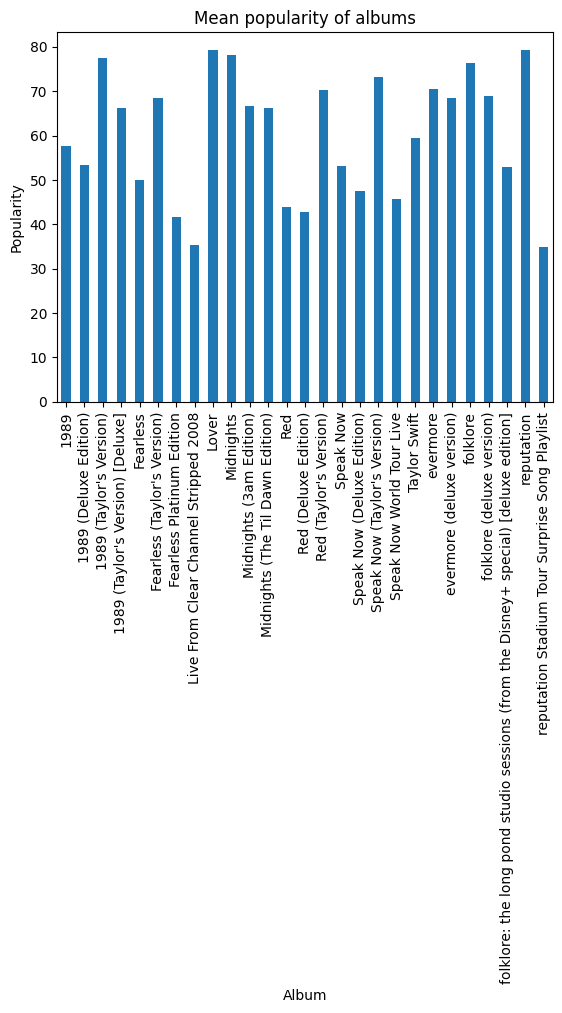

In [31]:
grouped_songs = songs.groupby('album')['popularity'].mean()
grouped_songs.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Mean popularity of albums')
plt.show()

### Track Number

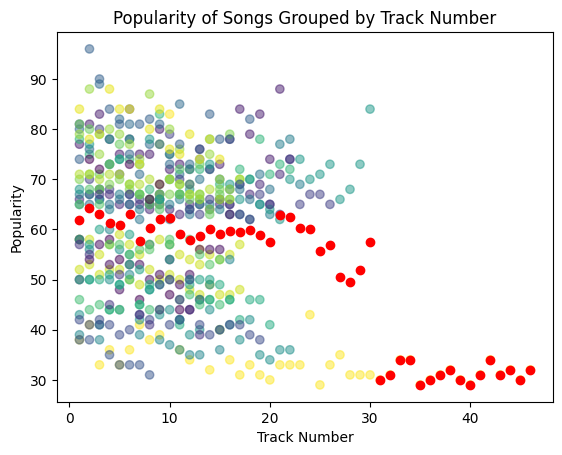

In [14]:
plt.scatter(songs['track_number'], songs['popularity'], c=songs['album'].astype('category').cat.codes, alpha=0.5)

grouped_songs = songs.groupby('track_number')['popularity'].mean()

plt.scatter(grouped_songs.index, grouped_songs.values, c='red')
plt.xlabel('Track Number')
plt.ylabel('Popularity')
plt.title('Popularity of Songs Grouped by Track Number')
plt.show()

### Checking datatypes

In [32]:
songs.dtypes

name                 object
album                object
track_number          int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
performed_live         bool
taylors_version        bool
deluxe_album           bool
dtype: object

### Feature Scaling

Popularity scaling

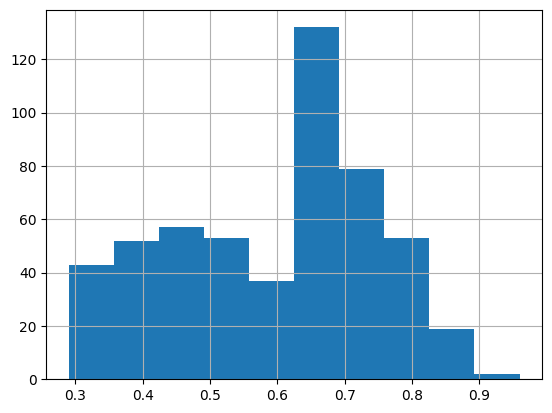

In [33]:
# Popularity [0,1]
songs_scaled = songs.copy()
songs_scaled['popularity'] = songs['popularity']/100
songs_scaled['popularity'].hist()
plt.show()

Duration Scaling (from ms to s)

In [34]:
# duration ms to s
songs_scaled['duration'] = songs_scaled['duration_ms'] / 1000
songs_scaled['duration'] = songs_scaled['duration'].astype(int)

songs_scaled = songs_scaled.drop(columns=['duration_ms'])

songs_scaled['duration'].head()

0    212
1    231
2    231
3    235
4    193
Name: duration, dtype: int32

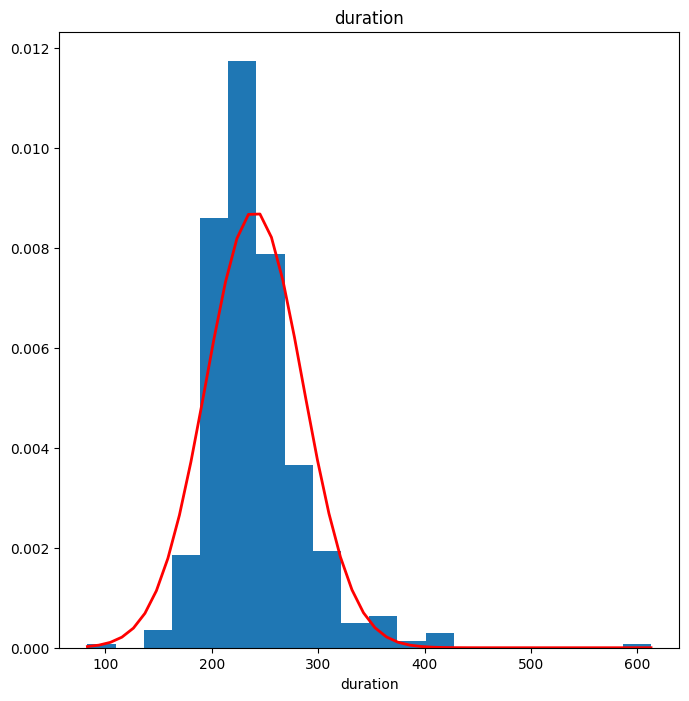

In [35]:
sigma=  songs_scaled.duration.std()
mu=  songs_scaled.duration.mean()
fig, ax = plt.subplots(figsize=(8,8))
count, bins, ignored = plt.hist(songs_scaled.duration, 20, density=True)
dbins = np.linspace(bins[0], bins[-1])
plt.title("duration")
ax.set_xlabel("duration")
plt.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (dbins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r');

In [36]:

# popularity vs duration
plt.scatter(songs_scaled['duration'], songs_scaled['popularity'], c = songs_scaled['release_date'])
plt.colorbar(label='Time')

# Linear regression line
x = songs_scaled['duration']
y = songs_scaled['popularity']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)

# NO té sentit categoritzar 'duration': per exemple 'short', 'average', 'long'




KeyError: 'release_date'

In [ ]:
# Scatter plot
plt.scatter(songs_scaled['release_date'], songs_scaled['duration'])

# Linear regression line
x = songs_scaled['release_date']
y = songs_scaled['duration']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)


We see that the duration of songs remains constant over time. We can't see a clear correlation between the song being 'short', 'medium' or 'long', so we might prefer to keep duration as a numeric variable instead of a categorical one.

Danceability, tempo, energy are all very correlated: we might try to create a new variable that combines them

We saw earlirer that these variables are correlated together, so in a future we might do future engineering to join them into a single one.

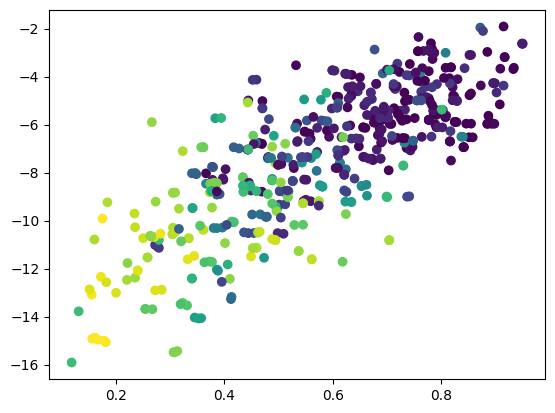

In [41]:
plt.scatter(songs_scaled['energy'], songs_scaled['loudness'], c = songs_scaled['acousticness'])
plt.show()

Instrumentalness

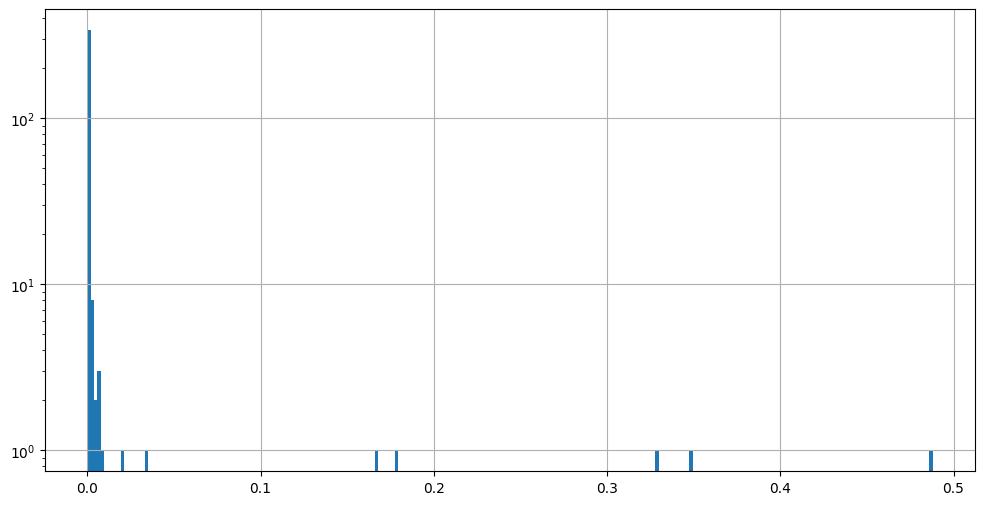

In [ ]:
songs_without_deluxe['instrumentalness'].hist(bins=250, log=True)

plt.show()

In [ ]:
songs['low_instrumentalness'] = 0.25 > songs['instrumentalness'] >= 0.05
songs['medium_instrumentalness'] = songs['instrumentalness'] >= 0.25

Valence

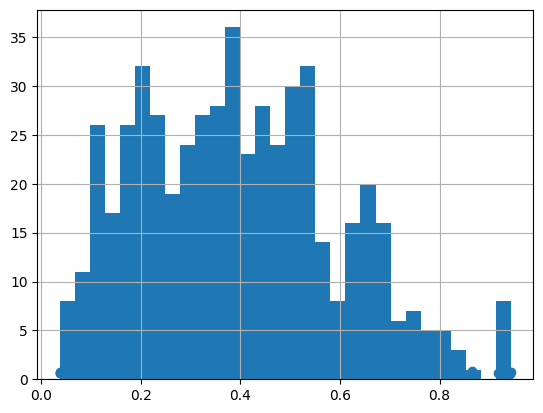

In [88]:
songs['valence'].hist(bins = 30)
songs.loc[songs['valence'] > 0.93]


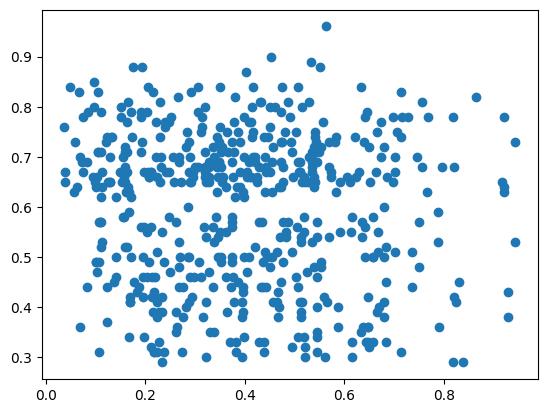

In [108]:

plt.scatter(songs_scaled['valence'], songs_scaled['popularity'])
plt.show()

Tempo

<Axes: >

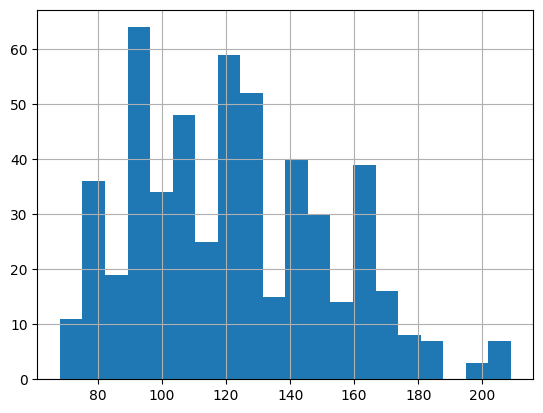

In [117]:
songs['tempo'].hist(bins = 15)

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,performed_live,taylors_version,deluxe_album,duration
142,Better Man (Taylor's Version) (From The Vault),Red (Taylor's Version),22,0.2140,0.473,0.579,0.000000,0.0877,-5.824,0.0384,73.942,0.255,0.70,False,True,False,297
181,tolerate it,evermore (deluxe version),5,0.8780,0.316,0.361,0.000027,0.0797,-10.381,0.0488,74.952,0.221,0.70,False,False,True,245
198,tolerate it,evermore,5,0.8780,0.316,0.361,0.000027,0.0797,-10.381,0.0488,74.952,0.221,0.77,False,False,False,245
234,this is me trying - the long pond studio sessions,folklore: the long pond studio sessions (from ...,9,0.9280,0.435,0.332,0.000898,0.0867,-11.611,0.0310,68.097,0.157,0.58,False,False,True,209
278,Lover,Lover,3,0.4920,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.453,0.90,False,False,False,221
292,It’s Nice To Have A Friend,Lover,17,0.9710,0.737,0.175,0.000337,0.1710,-9.912,0.0401,70.008,0.545,0.69,False,False,False,150
300,So It Goes...,reputation,7,0.1220,0.574,0.610,0.000001,0.1300,-7.283,0.0732,74.957,0.374,0.73,False,False,False,227
321,So It Goes...,reputation Stadium Tour Surprise Song Playlist,13,0.1220,0.574,0.610,0.000001,0.1300,-7.283,0.0732,74.957,0.374,0.56,True,False,False,227
341,Breathe,reputation Stadium Tour Surprise Song Playlist,33,0.4160,0.442,0.480,0.000000,0.1290,-7.405,0.0281,73.849,0.167,0.34,True,False,False,264
500,Breathe,Fearless,7,0.3790,0.505,0.482,0.000000,0.1130,-7.372,0.0276,73.975,0.184,0.43,False,False,False,263


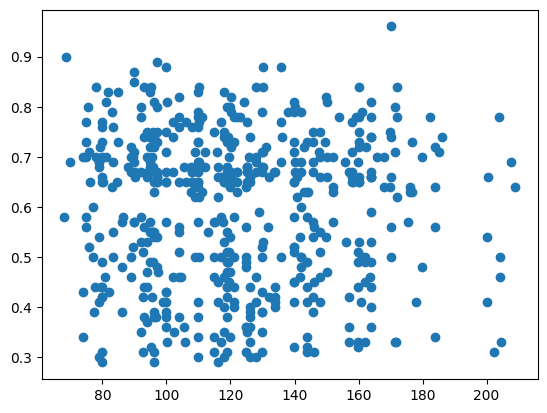

In [141]:
plt.scatter(songs_scaled['tempo'], songs_scaled['popularity'])

songs_scaled.loc[songs_scaled['tempo'] < 75]


Speechiness

<Axes: >

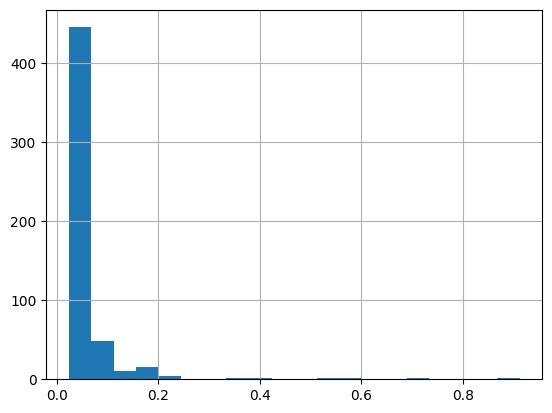

In [151]:
songs['speechiness'].hist(bins = 20)

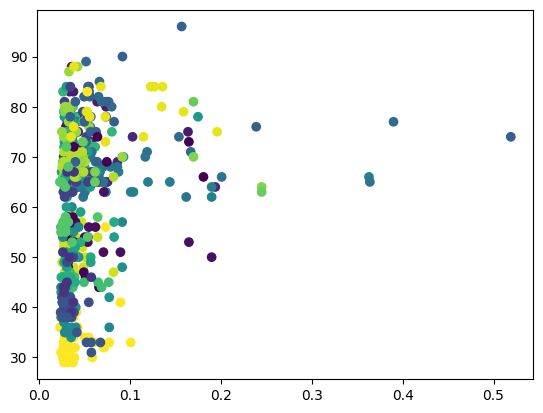

In [165]:
plt.scatter(songs['speechiness'], songs['popularity'], c=songs['album'].astype('category').cat.codes)

In [23]:
songs['spoken_section'] = songs['speechiness'] > 0.33 

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,deluxe_album,taylors_version,performed_live
72,Vigilante Shit,Midnights (The Til Dawn Edition),2023.401826,8,0.157,0.867,0.272,0.000034,0.1180,-11.014,0.363,79.962,0.157,66,164801,False,False,False
95,Vigilante Shit,Midnights (3am Edition),2022.807534,8,0.160,0.870,0.279,0.000017,0.1210,-11.134,0.364,79.996,0.160,65,164801,False,False,False
115,Vigilante Shit,Midnights,2022.804795,8,0.173,0.798,0.277,0.000053,0.1210,-11.096,0.390,79.846,0.163,77,164801,False,False,False
276,I Forgot That You Existed,Lover,2019.643607,1,0.298,0.664,0.316,0.000002,0.0812,-10.345,0.519,92.875,0.541,74,170640,False,False,False


In [ ]:
songs['s']

### Normalizing variables

In [ ]:
# TODO